# Color Selection

In [1]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
i = cv2.imread('./data/test.jpg')

In [ ]:
cv2.imshow('i', i)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
image = mpimg.imread('./data/test.jpg')
plt.figure(figsize=(10, 10))
plt.imshow(image)

In [ ]:
image.shape

In [ ]:
color_select = np.copy(image)

# To Do
red_threshold = 230
green_threshold = 230
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

thresholds = (image[:,:,0] < rgb_threshold[0]) | (image[:,:,1] < rgb_threshold[1]) | (image[:,:,2] < rgb_threshold[2])
        
color_select[thresholds] = [0, 0, 0]

ret, dst = cv2.threshold(color_select, 160, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15, 15))
plt.imshow(dst)

# Region Masking

In [ ]:
image = mpimg.imread('./data/test.jpg')

In [ ]:
# To Do

left_bottom = [150, 539]
apex = [400, 330]
right_bottom =[800, 539]
right_top = [480, 330]

region_select = np.copy(image)

pts = np.array([left_bottom, apex, right_bottom])

In [ ]:
cv2.fillPoly(region_select, [pts], color=[255, 0, 0])

In [ ]:
image.shape

In [ ]:
width, height, _ = image.shape

In [ ]:
srcQuad = np.array([apex, right_top, right_bottom, left_bottom], dtype=np.float32)
dstQuad = np.array([[0, 0], [width-1, 0], [width - 1, height -1], [0, height-1]], dtype=np.float32)
M = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(image, M, (width, height))

In [194]:
dstQuad.shape

(4, 2)

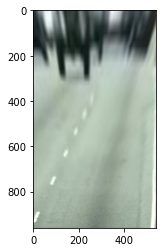

In [195]:
plt.imshow(dst)

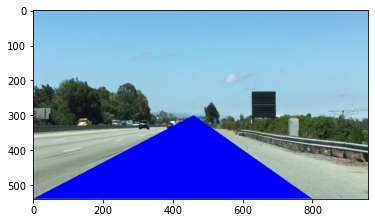

In [323]:
image = mpimg.imread('./data/test.jpg')

ysize, xsize, _ = image.shape

# To Do

left_bottom = [0, 539]
apex = [460, 300]
right_bottom =[800, 539]
right_top = [480, 330]

region_select = np.copy(image)

pts = np.array([left_bottom, apex, right_bottom])

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)

fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)

fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = ((YY > (XX * fit_left[0] + fit_left[1])) &
                     (YY > (XX * fit_right[0] + fit_right[1])) &
                    (YY < (XX * fit_bottom[0] + fit_bottom[1]))) # 방정식 ax + b의 형태

region_thresholds.shape

region_select[region_thresholds] = [0, 0, 255]

#cv2.fillPoly(region_select, [pts], color=[255, 0, 0])

plt.imshow(region_select)

# Color and Region Selection

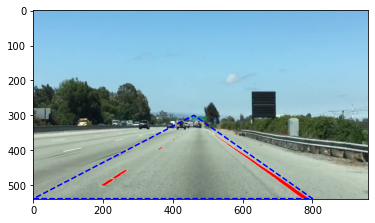

In [344]:
image = mpimg.imread('./data/test.jpg')

line_image = np.copy(image)
ysize, xsize, _ = image.shape
##### color #####
color_select = np.copy(image)


# To Do
red_threshold = 230
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

color_thresholds = (image[:,:,0] < rgb_threshold[0]) | (image[:,:,1] < rgb_threshold[1]) | (image[:,:,2] < rgb_threshold[2])
        
color_select[color_thresholds] = [0, 0, 0]

##### region #####
# To Do

left_bottom = [0, 539]
apex = [460, 300]
right_bottom =[800, 539]
right_top = [480, 330]

region_select = np.copy(image)

pts = np.array([left_bottom, apex, right_bottom])

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)

fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)

fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = ((YY > (XX * fit_left[0] + fit_left[1])) &
                     (YY > (XX * fit_right[0] + fit_right[1])) &
                    (YY < (XX * fit_bottom[0] + fit_bottom[1]))) # 방정식 ax + b의 형태

region_thresholds.shape

region_select[region_thresholds] = [0, 0, 255]

#cv2.fillPoly(region_select, [pts], color=[255, 0, 0])

line_image[~color_thresholds & region_thresholds] = [255, 0, 0] # 구역안에 있고 색이 없지 않은 것에 대해서 빨간색을 칠함

plt.imshow(line_image)

x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', 4) # 임의로 정한 roi를 뽑아냄.
plt.imshow(line_image)

# Canny Edge Detection

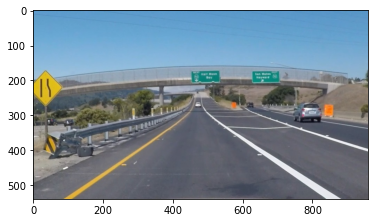

In [345]:
image = mpimg.imread('./data/exit-ramp.jpg')
plt.imshow(image)

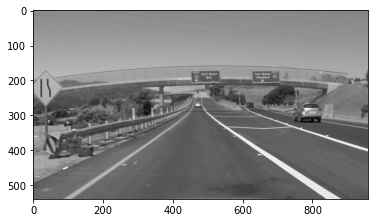

In [349]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

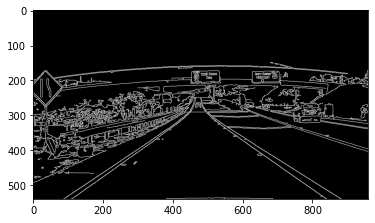

In [367]:
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

# ToDo

low_threshold= 30
hight_threshold = 150

edges = cv2.Canny(gray, low_threshold, hight_threshold)
plt.imshow(edges, cmap='Greys_r')

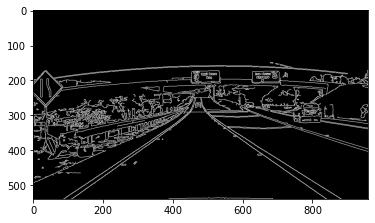

In [370]:
image = mpimg.imread('./data/exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

low_threshold= 50
hight_threshold = 150

edges = cv2.Canny(gray, low_threshold, hight_threshold)
plt.imshow(edges, cmap='Greys_r')

# Hough Transform

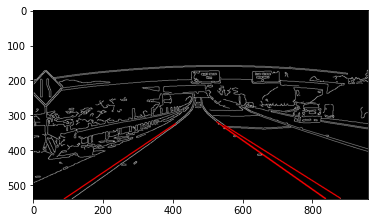

In [439]:
image = mpimg.imread('./data/exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

line_image = np.copy(image)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

low_threshold= 50
hight_threshold = 150

#ToDo
rho = 1 #픽셀 양
theta = np.pi/180
threshold = 160 # 직선으로 판단할 수 있는 허프공간에서의 교차점 개수 
min_line_length = 270
max_line_gap = 20


edges = cv2.Canny(blur_gray, low_threshold, hight_threshold)
lines = cv2.HoughLinesP(edges, rho, theta, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)

color_edge = np.dstack((edges, edges, edges))

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(color_edge, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
plt.imshow(color_edge)

In [415]:
lines.shape

(8, 1, 4)

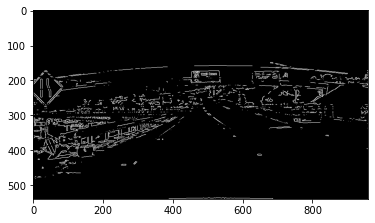

In [401]:
plt.imshow(edges, cmap='Greys_r')

# ROI Selection and Hough Transform

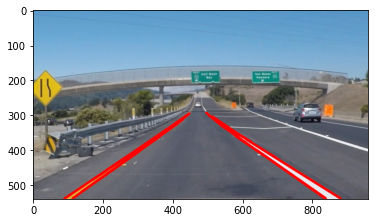

In [22]:
image = mpimg.imread('./data/exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

low_threshold= 50
hight_threshold = 150

left_bottom = [0, 539]
left_top = [450, 300]
right_bottom =[800, 539]
right_top = [490, 330]

#ToDo
rho = 1
theta = np.pi/180
threshold = 15 # 직선으로 판단할 수 있는 허프공간에서의 교차점
min_line_length = 40
max_line_gap = 20

#mask = np.zeros(edges.shape)

edges = cv2.Canny(blur_gray, low_threshold, hight_threshold)

# 추가 (ROI)
mask = np.zeros(edges.shape, dtype=edges.dtype)
#vertices = np.array([left_top, right_top, left_bottom, right_bottom], dtype=np.int32)
vertices = np.array([[(0,image.shape[0]),(450, 290), (490, 290), (image.shape[1],image.shape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, 255)
masked_edges = cv2.bitwise_and(edges, mask)

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)

edge_3d = np.dstack((edges, edges, edges)) # == cv2.merge([edges, edges, edges])

for line in lines:
    x1, y1, x2, y2 = line[0]
    # edge_3d = [0, 0, 0]
    # cv2.line(edge_3d, (x1, y1), (x2, y2), (255, 0, 0), 5)
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 5)
#cv2.bitwise_and(edge_3d, edge_3d, mask=image)
    
plt.imshow(image)

In [19]:
plt.imshow(masked_edges, cmap='Greys_r')

NameError: name 'masked_edges' is not defined

In [444]:
image = mpimg.imread('./data/test.jpg')

ysize, xsize, _ = image.shape

# To Do


left_bottom = [0, 539]
apex = [460, 300]
right_bottom =[800, 539]
right_top = [480, 330]
region_select = np.copy(image)

pts = np.array([left_bottom, apex, right_bottom])

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)

fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)

fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = ((YY > (XX * fit_left[0] + fit_left[1])) &
                     (YY > (XX * fit_right[0] + fit_right[1])) &
                    (YY < (XX * fit_bottom[0] + fit_bottom[1]))) # 방정식 ax + b의 형태

region_select[region_thresholds] = [0, 0, 255]

# Workshop

In [16]:
image = mpimg.imread('./data/test_images/whiteCarLaneSwitch.jpg')

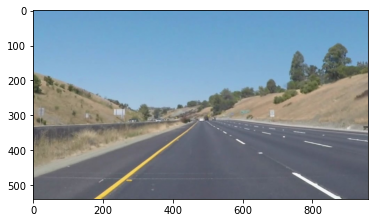

In [17]:
plt.imshow(image)